### Non-Linear SVM - ML
- SVMs are algorithms for classification and regression tasks.
- Non-Linear SVM extends SVM to handle complex, non-linearly seperable data using kernels.
#### What is kernel?
- kernel is a function that computes the dot product of two vectors in a high-dimensional feature space without explicitly mapping the data into that space.
#### Popular kernel functions in SVM
#### 1. Radial Basis Function(RBF):
- Captures patterns in data by measuring the distance between points and is ideal for circular (or) spherical relationships.
- It is widely used as it creates flexible decision boundary.
#### 2. Linear Kernel:
- Works for data that is linearly separable problem without complex transformations.
#### 3. Polynomial Kernel:
- Models more complex relationships using polynomial equations.
#### 4. Sigmoid Kernel:
- Mimics neural network behavior using sigmoid function and is suitable for specific non-linear problems.

### Example 1: Non linear SVM in Circular Decision Boundary
#### 1. Importing Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


#### 2. Creating and Splitting the Dataset
- sklearn.datasets.make_circles(n_samples=100, shuffle=True, noise=None, random_state=None, factor=0.8)
- Where,
  - n_samples - If int, it is the total number of points generated.For odd numbers, the inner circle will have one point morethan the outer circle.If two-element tuple, number of points in outer circle and inner circle.
  - shuffle - bool, default=True [ Where to shuffle the samples ].
  - noise - float, default=None [ Standard deviation of Gaussian noise added to the data ].
  - random_state - int, default=None [ sets a fixed seed for the random generator number to ensure reproducible results across different runs of the code ].
  - factor - float, default=.8 [Scale factor between inner and outer circle in the range[0,1).]
- sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
- Where,
  - *arrays - Allowed inputs are lists, numpy arrays, scipy-sparse matrics (or) pandas dataframes.
  - test_size, train_size - float (or) int, default=None [ If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the train split.If int, represents the absolute number of train samples.If None, the value is automatically set to the complement of the test size ].
  - shuffle - bool, default=True [ Wheather(or) not to shuffle the data before splitting.If shuffle=False then startify must be None. ]

In [3]:
X, y = make_circles(n_samples=500, factor=0.5, noise=0.05, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### 3. Creating and Training the Non-Linear SVM Model
- We create an SVM classifier using the RBF kernel to handle non-linear patterns and train it on the data.

In [4]:
svm = SVC(kernel='rbf', C=1, gamma=0.5)
svm.fit(X_train, y_train)

SVC(C=1, gamma=0.5)

#### 4. Making Predictions and Evaluating the Model
- We predict the labels for the test set and compute the accuracy of the model.

In [5]:
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy:{accuracy:.2f}")

Accuracy:1.00


#### 5. Visualizing the Decision Boundary
- We define a function to visualize the decision boundary of the trained non-linear SVM on the dataset.


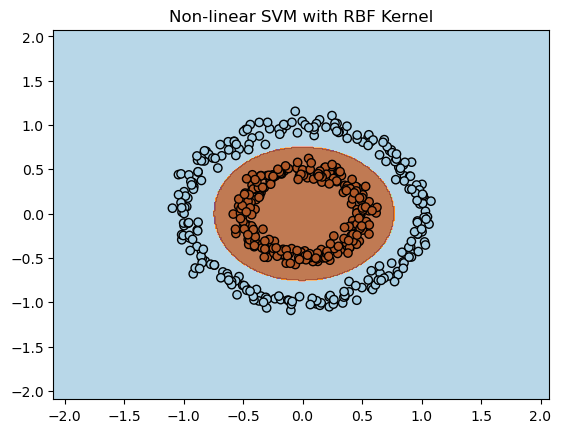

In [6]:
def plot_decision_boundary(X, y, model):
    x_min, x_max= X[:,0].min() -1, X[:,0].max()+1
    y_min, y_max= X[:,0].min() -1, X[:,0].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    plt.scatter(X[:,0], X[:,1], c=y, edgecolor='k', cmap=plt.cm.Paired)
    plt.title("Non-linear SVM with RBF Kernel")
    plt.show()

plot_decision_boundary(X, y, svm)

- Non-linear SVM provided a decision boundary where the SVM successfully seperates the two circular classes(inner and circles) using a curved boundary with help of RBF kernel.

### Example 2: Non linear SVM for Radial Curve Pattern
- Now we will see how differen kernel works. We will be using polynomial kernel function for dataset with radical curve patteren.
#### 1. Importing Libraries:

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

#### 2. Creating and splitting the Dataset
- We generate a synthetic "two moons" dataset which is non-linearly seperable and split it into training and test sets.
-  make_moons() - Make two interleaving half circles.
- Syntax - sklearn.make_moons(n_samples=100, *, shuffle=True, noise=None, random_state=None)
- Where,
  - n_samples - If int, the total number of points generated.If two-element tuple, number of points in each of two moons.
  - shuffle - float, default=None [ Wheather to shuffle the samples. ]
  - noise - float, default=None [ Standard deviation of Gaussian noise added to the data ]
  - random_state - int, default=None [ sets a fixed seed for random number generator to ensure reproducible results across different runs of the code. ]
- train_test_split() - It is used for divide datasets into training and testing subsets for machine learning model evaluation.
- sklearn.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
- Where,
  - *arrays - Allowed inputs are lists, numpy arrays, scipy-sparse matrics (or) pandas dataframes.
  - test_size, train_size - float (or) int, default=None [ If float, should be between 0.0 and 1.0 and represent the proportion of the datasets include in the test split.If int, represents the absolute number of test samples.If None, value is set to the complement of the train size.If train_size is also None, it will be set to 0.25 ]
  - random_state - int, default=None [ sets a fixed seed for random number generator to ensure reproducible results across different runs of the code ]
    

In [21]:
X, y = make_moons(n_samples=500, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### 3. Creating and training the SVM with Polynomial Kernel
- We build an SVM Classifier with a polynomial kernel and train it on the training data.
-SVC(support Vector Classifier) - It is a supervised machine learning algorithm used for classification taks, particularly effective in high-dimensional spaces and when dealing with non-linear decision boundaries.
- Syntax - sklearn.svm.SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probaility=False, tol=0.001, cach_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
- Where,
  - kernel - {'linear','poly','sigmoid','precomputed'} (or) default='rbf'
  - degree - int, default=3
  - C - float, default=1.0
  - coef0 - float, default=0.0

In [22]:
svm_poly = SVC(kernel='poly', degree=3, C=1, coef0=1)
svm_poly.fit(X_train, y_train)

SVC(C=1, coef0=1, kernel='poly')

#### 4. Making Predictions and Evaluating the Model
- We used the trained model to predict test labels and evaluate its accuracy.

In [23]:
y_pred = svm_poly.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score:{accuracy:.2f}")

Accuracy Score:1.00


#### 5.  Visualizing the Decision Boundary
- We define afunction to plot the decision boundary learned by the SVM with a polynomial kernel.

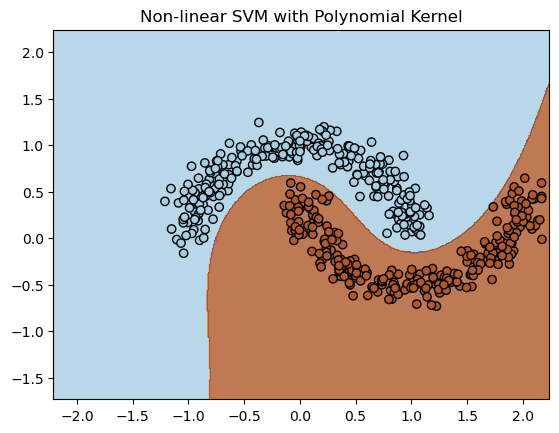

In [25]:
def plot_decision_boundary(x, y, model):
    x_min, x_max = X[:,0].min() - 1, X[:,1].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    plt.scatter(X[:,0], X[:,1], c=y, edgecolor='k', cmap=plt.cm.Paired)
    plt.title('Non-linear SVM with Polynomial Kernel')
    plt.show()

plot_decision_boundary(X, y, svm_poly)

- Polynomial kernel creates a smooth, non-linear decision boundary that effectively seperates the two curved regions.